In [48]:
import pydicom
from pathlib import Path

dcm_path = "/home/luis/GH/Dosepy/tests/unit/fixtures/RTDose_3D.dcm"

ds = pydicom.dcmread(dcm_path)

img = pydicom.pixels.pixel_array(ds) * ds.DoseGridScaling

img.shape

(60, 90, 102)

In [ ]:
# From DICOM

# Frames 60
# Columns 102
# Rows 90

# Pydicom (z, y, x)
# SimpleITK (x, y, z)

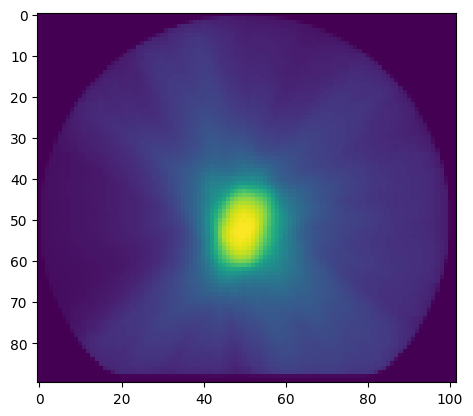

In [3]:
import matplotlib.pyplot as plt

plt.imshow(img[30,:,:])

In [4]:
import numpy as np

np.mean(img[30,:,:])

np.float64(2.0517887993876722)

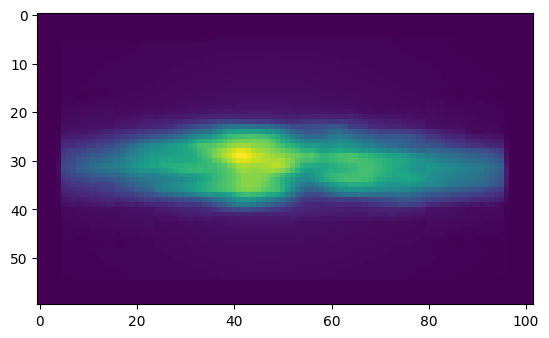

In [5]:
plt.imshow(img[:,30,:])

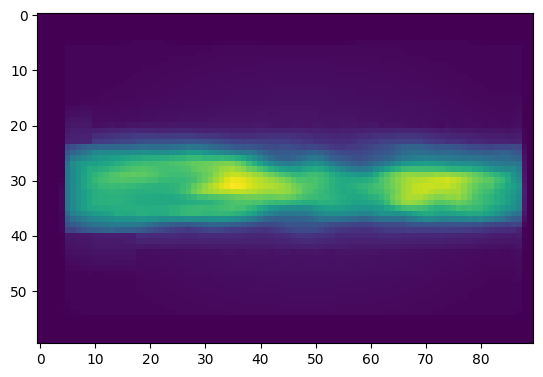

In [19]:
plt.imshow(img[:,:,30])

In [21]:
np.mean(img[:,:,30] + img[:,:,31])/2

np.float64(0.4599306885381899)

In [65]:
np.mean(img[:,:,30])

np.float64(0.44830350386730344)

In [64]:
type(img)

numpy.ndarray

In [60]:
s1 = np.mean(img[:, 30, :])
s1

np.float64(0.4431658467468006)

In [62]:
s2 = np.mean(img[:, 31, :])
s2

np.float64(0.45430582520722956)

In [56]:
s_mean = (s1 + s2) / 2
s_mean

np.float64(0.44873583597701505)

In [9]:
import SimpleITK as sitk

itk_img = sitk.ReadImage(dcm_path)

itk_img.GetOrigin()

(-92.9, -328.3, -59.0)

In [57]:
-328.3 + 30*2

-268.3

In [10]:
itk_img.GetSpacing()

(2.0, 2.0, 2.0)

In [11]:
# Get position of slice 30 y 31
-92.9 + 30*2

-32.900000000000006

In [12]:
# Get position of slice 30 y 31
-92.9 + 31*2

-30.900000000000006

In [17]:
reader = sitk.ImageFileReader()
reader.SetFileName(dcm_path)
reader.LoadPrivateTagsOn()
reader.ReadImageInformation()

reader.GetMetaData("3004|000e")

'1.296932754e-05 '

In [18]:
image = sitk.Image(256, 128, 64, sitk.sitkInt16)

print(image.GetWidth())
print(image.GetHeight())
print(image.GetDepth())

256
128
64


In [45]:
#dcm_path = Path(__file__).parent / "fixtures" / "RTDose_3D.dcm"

img = sitk.ReadImage(
    dcm_path,
    outputPixelType=sitk.sitkFloat64
    )

reader = sitk.ImageFileReader()
reader.SetFileName(dcm_path)
reader.LoadPrivateTagsOn()
reader.ReadImageInformation()
dose_scaling = float(reader.GetMetaData("3004|000e"))

img = img * dose_scaling

img.GetSize()

(102, 90, 60)

In [ ]:
# From DICOM

# Frames 60
# Columns 102
# Rows 90

# Pydicom (z, y, x)
# SimpleITK (x, y, z)

In [33]:
img[30, :, :].GetSize()

(90, 60)

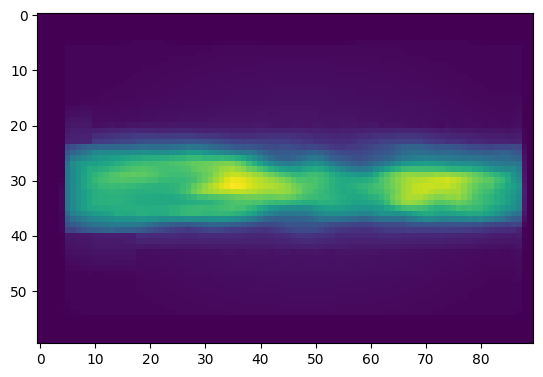

In [47]:
plt.imshow(sitk.GetArrayFromImage(img[30, :, :]))

(array([   0.,    0.,    0.,    0.,    0., 5400.,    0.,    0.,    0.,
           0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

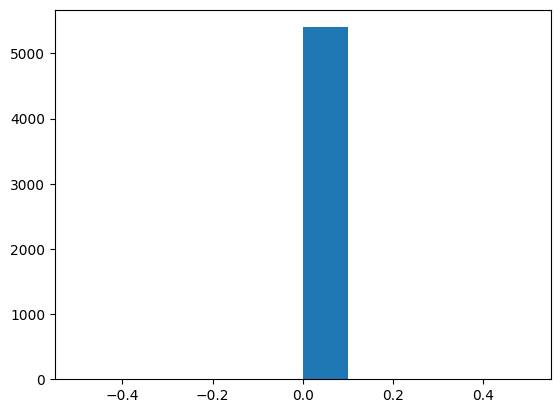

In [36]:
plt.hist(sitk.GetArrayFromImage(img[30, :, :]).ravel())

In [44]:
float(reader.GetMetaData("3004|000e"))

1.296932754e-05